In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = {
    'Square_Feet': [1500, 1800, 2400, 3000, 3500, 1200, 4000, 2100, 2700, 3200],
    'Price': [300000, 350000, 470000, 585000, 690000, 240000, 780000, 410000, 530000, 620000]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Square_Feet,Price
0,1500,300000
1,1800,350000
2,2400,470000
3,3000,585000
4,3500,690000
5,1200,240000
6,4000,780000
7,2100,410000
8,2700,530000
9,3200,620000


In [6]:
X = df[['Square_Feet']]
y = df['Price']


In [18]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [19]:
x_test = scaler.transform(x_test)

In [20]:
regression =LinearRegression()
regression.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
from sklearn.model_selection import cross_val_score


mse = cross_val_score(regression, X, y, cv=2, scoring='neg_mean_squared_error')


Average Error (MSE): 19325995.943616167


In [26]:
np.mean(mse)

np.float64(-19325995.943616167)

In [23]:
reg_pred=regression.predict(x_test)

In [24]:
reg_pred

array([528766.4382293 , 355025.93072791])

C:\Users\hayya\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


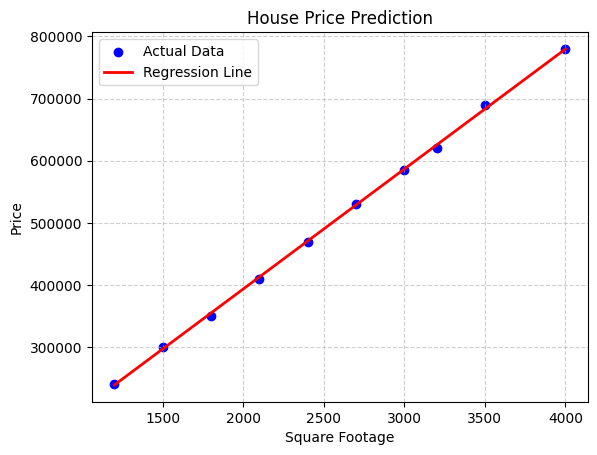

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(X, y, color='blue', label='Actual Data')


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
y_line = regression.predict(X_range_scaled)


plt.plot(X_range, y_line, color='red', linewidth=2, label='Regression Line')

plt.title('House Price Prediction')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()